In [0]:
# Do not delete or change this cell

# grading import statements
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

#Roulette Monte Carlo Simulation
In the game of [roullete](https://en.wikipedia.org/wiki/Roulette) you can bet on several things including if the ball will land on black or red. In a black or red bet, if you win, you double your earnings. How does the casino make money? If you look at the possibilities you realize that the chance of red or black are both slightly less than 1/2. There are two green spots, so the chance of landing on black (or red) is actually 18/38, or 9/19.<br>
Create a utility function which can be used in a monte carlo simulation named get_outcome. The get_outcome function takes as an argument the number of times you play (or spin) the roulette wheel and returns the player's earnings for the number of spins specified.  Assume that the player bets exactly one dollar on black for each spin of the wheel.

In [0]:
# your code here
import random
import numpy as np 
def get_outcome(x):
    result = [-1,1] #player can either lose or gain one dollar assuming they bet on black each time. This results sample space justifies a player doubling their money if they win 
    spin = np.random.choice(result,x,replace=True,p=outcome_prob) #using numpys random choice function with replacement and definining each players outcomes below and outside of the function 
    return(sum(spin))
num_plays = 1000000
#since there is a 20/38 probability that the player will lose, the outcome probability list reflects the players odds
outcome_prob = [10/19,9/19]
total = get_outcome(num_plays)
clt_prob = total / num_plays
print("The Total Earnings for this Player is: $",total)
print("the Rate of Return following this monte carlo simulation is:" ,round(clt_prob,2)*100 , '% after' , num_plays , 'spins')

The Total Earnings for this Player is: $ -53034
the Rate of Return following this monte carlo simulation is: -5.0 % after 1000000 spins

In [0]:
# Grading cell - do not change or delete
num_plays = 1000
get_outcome(num_plays) / num_plays

Out[2]: -0.056

#Running 4 simulations with differenrt numbers of Hypothetical Roulette plays
Using the get_outcome function defined above, use a monte carlo simulation to study the distribution of total earnings.  Run 4 simulations for number of roulette plays = 10, 25, 100, and 1000 where each of the 4 simulations is executed 500 times.  Collect the results into a 2 dimensional numpy array named roulette_sim_array.  The data frame shall have 4 labeled columns where each column contains data from each of the 4 simulations. Create histograms that show the distributions of total earnings for the 4 simulations.  Based on the histogram plots, describe what happens to toal earnings as the number of plays increases.

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
roulette_plays = [10,25,100,1000]
#Below we create four empty lists that will append the monte carlo simulation results for each 'roll' scenario
roul_ten = []
roul_twent = []
roul_onehundred = []
roul_one_thousand = []
# the empty list below will be used to fuse together the results from our four lists above
roulette_sim_array = []
for i in roulette_plays: #this for loop will use the elements in our roulette_plays list to iterate through 
    #each of the 500 Monte Carlo simulations and append the total earnings outcome using the get_function created in problem 1
    x = 1
    while x<=500: #we are executing each simulation 500 times so we start at 1 and increment it each time for each scenario
        x+=1
        if i == 10: 
            roul_ten.append(get_outcome(i))
        elif i == 25: 
            roul_twent.append(get_outcome(i))
        elif i == 100: 
            roul_onehundred.append(get_outcome(i))
        else:
            roul_one_thousand.append(get_outcome(i))
        
# these lists must now be stacked and reshaped into a 2 dimensional numpy array
roulette_sim_array = np.vstack([roul_ten,roul_twent,roul_onehundred,roul_one_thousand])
roulette_sim_array = np.array(roulette_sim_array, ndmin = 2)#2-d array
print(roulette_sim_array)
#This is fine, however we will need to transpose this array and place it into a dataframe in order to have each roll scenario reflect a column 
#Therefore, our  data frame should have 4 columns and 500 rows
#Currently the array contains 500 columns and 4 rows so it will need to be transposed
#create dataframe 
#more games played more money lost
roulette_sim_array.shape
#transposing our array and placing it into a dataframe
roulette_df = pd.DataFrame(roulette_sim_array).T
#defining our column names for each monte carlo simulation
roulette_df.columns = ['10','25','100','1000']
roulette_df

,10,25,100,1000
0,-2,3,-14,-78
1,2,-7,-26,-78
2,4,1,-2,0
3,6,1,-12,-46
4,4,-11,2,-18
...,...,...,...,...
495,0,-1,10,-82
496,4,-5,-8,-46
497,2,-5,-14,-50
498,2,1,-20,-26


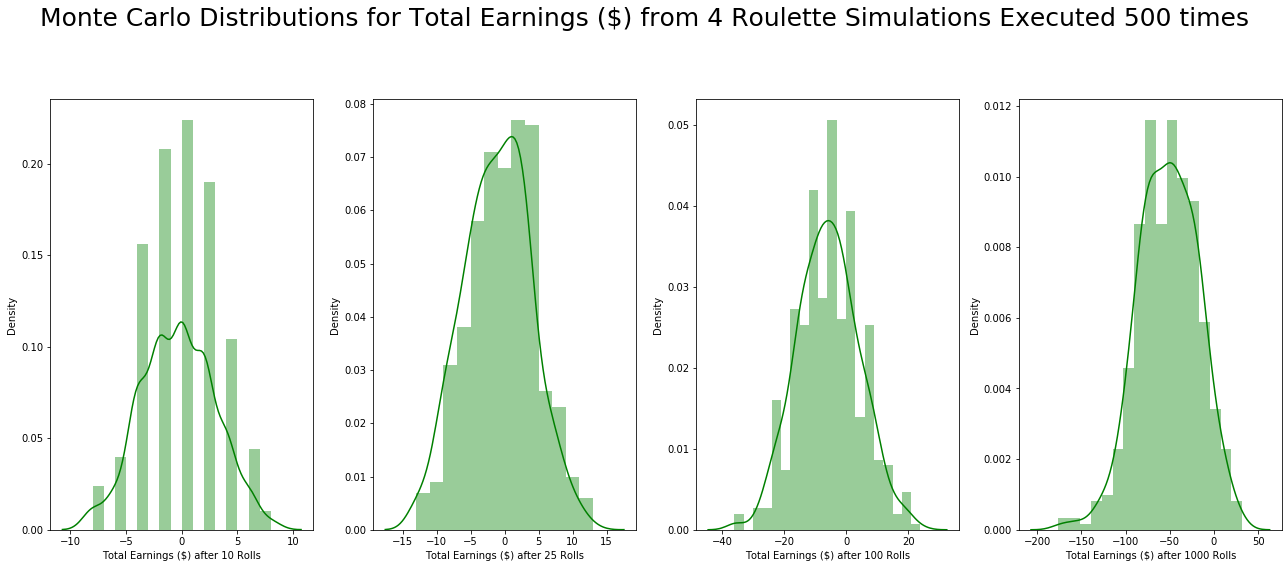

In [0]:
# Your histogram code here
#df.describe()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#creating 4 probability density histograms based on each column of our dataframe
hist, axes = plt.subplots(ncols=4)
hist.set_size_inches(18, 8)
rolls = [10,25,100,1000] 
#Code snippet for creating multiple histograms on the same line with seaborn/matplotlib
for i,j, ax, col in zip(range(4),rolls,axes, roulette_df.columns):
    sns.distplot(roulette_df[col], ax=ax, color='g')
    axes[i].set_xlabel('Total Earnings ($) after '+ str(j) +' Rolls')
    axes[i].set_ylabel('Density')
hist.tight_layout()
hist.subplots_adjust(top=0.82)
#Title
hist.suptitle('Monte Carlo Distributions for Total Earnings ($) from 4 Roulette Simulations Executed 500 times', size = 25)
plt.show()

Your explanation here:<br>  
As the number of rolls increases throughout our monte carlo simulation, the mean total earnings shift steadily to the left of 0. This shows that it is extremely rare for players to break even if they play 1000 games of roulette. It appears in our fourth histogram, that profiting after 1000 spins is about 2 standard deviations above the mean, so only approximately 2% of players will fall into this category. The first histogram (10 rolls executed 500 times) seems normally distributed around 0 which insinuates that you have roughly equal chances of winning and losing. This is more or less accurate because gamblers don't usually consider the 3% descrepancy in their vs. the casino's odds of winning: but statistical frequentists do. Moral of the story is: players should walk away early when they're up or simply not go to the casino at all.

#Using CLT to create a roulette_df containing the sampling distribution of the means from the sample data obtained from the Monte Carlo Simulations
Using the central limit theorem, create a pandas dataframe named roulette_df containing the sampling distribution of the means from the sample data in the numpy array above.  The pandas dataframe should have 4 columns labeled with the simulation names. Using data in the roulette_df, plot histograms for each of the sampling distributions - you should have 4 histograms in total.<br>  Assuming you don't know the underlying distribution of the population from which the samples were drawn, some of the histograms are gauranteed to be Gaussian in shape, some are not gauranteed, and some are in a transition region. For each of the 4 simulations, describe if you think the shape is gauranteed to be gaussian, not gauranteed to be Gaussian, or in a transition area between a gaurantee and no gaurantee.

In [0]:
rolls = [10,25,100,1000] #each cell in our earnings dataframe must be divided by how many rolls occured in each scenario to obtain the sample means
for i,j in zip(rolls, range(len(roulette_df.columns))):
               roulette_df.iloc[:,j] = roulette_df.iloc[:,j]/i        
roulette_sampling = roulette_df
roulette_sampling

,10,25,100,1000
0,-0.2,0.12,-0.14,-0.078
1,0.2,-0.28,-0.26,-0.078
2,0.4,0.04,-0.02,0.000
3,0.6,0.04,-0.12,-0.046
4,0.4,-0.44,0.02,-0.018
...,...,...,...,...
495,0.0,-0.04,0.10,-0.082
496,0.4,-0.20,-0.08,-0.046
497,0.2,-0.20,-0.14,-0.050
498,0.2,0.04,-0.20,-0.026


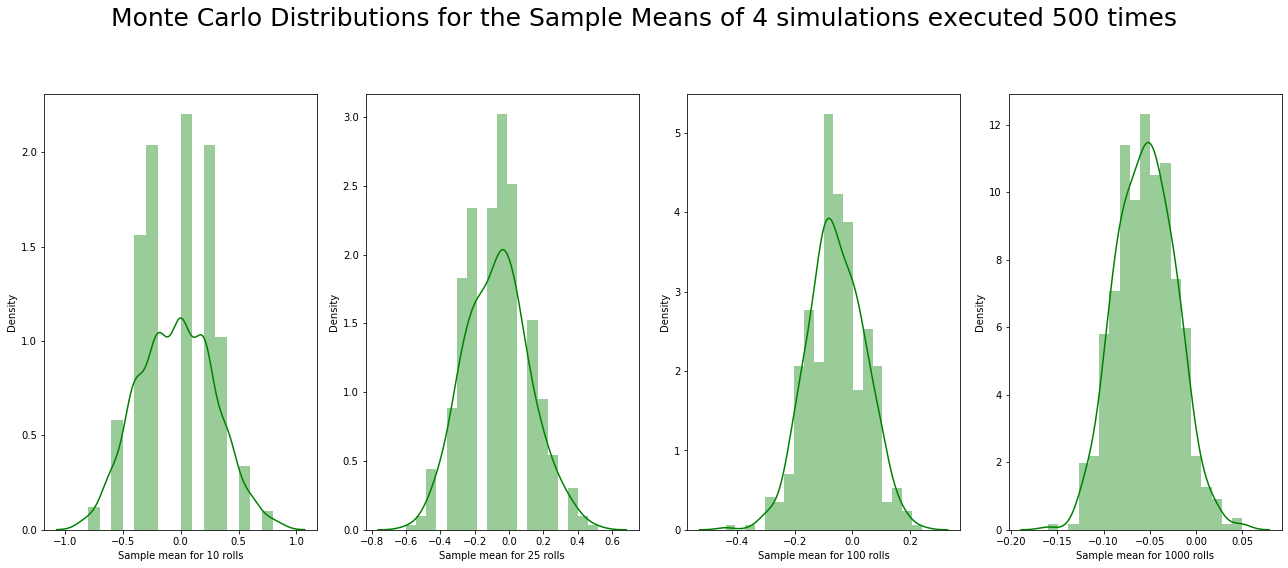

In [0]:
# Your histogram code here
#df.describe()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%matplotlib inline
#manipulating our code snippet from before
hist, axes = plt.subplots(ncols=4)
hist.set_size_inches(18, 8)
rolls = [10,25,100,1000]
for i,j, ax, col in zip(range(4),rolls,axes, roulette_sampling.columns):
    sns.distplot(roulette_sampling[col], ax=ax, color='g')
    axes[i].set_xlabel('Sample mean for '+ str(j) +' rolls')
    axes[i].set_ylabel('Density')

hist.tight_layout()
hist.subplots_adjust(top=0.83)
hist.suptitle('Monte Carlo Distributions for the Sample Means of 4 simulations executed 500 times', size = 25)
plt.show()

In [0]:
# Grading cell - do not modify
roulette_df.head()

,10,25,100,1000
0,0.0,0.28,-0.02,-0.030
1,0.2,-0.28,0.08,-0.026
2,-0.4,0.04,-0.14,-0.046
3,0.2,-0.12,0.02,-0.028
4,0.4,0.12,-0.04,-0.070


Your explanation here:<br>
These histograms are all take on the same distribution as the previous ones given that we are only dividing by a constant. Given that these results are normally distributed we have divided each value in every column by the number of plays in order to obtain the sample means. The mean, which is roughly approximate to the median, is settling slightly to the left of 0 as the number of rolls increases, whereas the first histogram seems to be centered around 0.

#Deeper Dive using Monte Carlo Simulations to Calculate the Probability of a Casino losing Money
Create a new monte carlo simulation that calculates the probability that the casino loses money based on the number of times that a player plays roulette.  Create a function p_casino_loss that takes as an argument the number of times that the player plays roulette, and returns the probability that the casino loses money.  Using data collected from p_casino_loss, produce a line plot that shows the probability that the casino loses money vs. the number of games played for number of games between 25 and 1000.  Describe what the results of the simulation show.

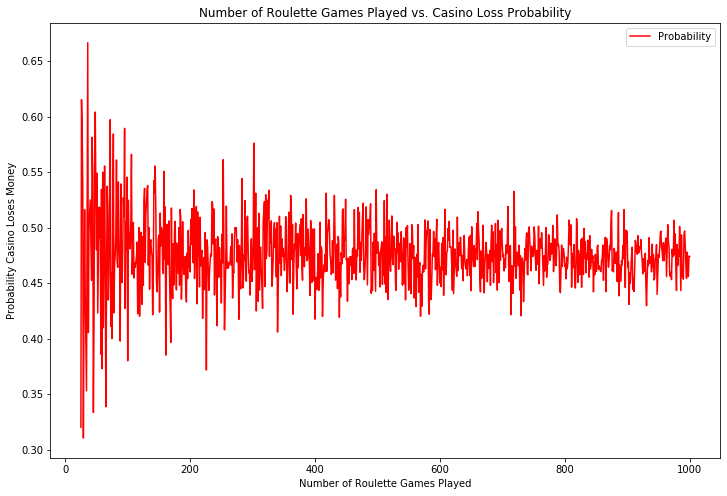

In [0]:
# your code here
def p_casino_loss(num_play):
    outcome_prob = [10/19,9/19] #same probability sample space
    result = [-1,1] #player can either lose or gain a dollar (equivalent to doubling money)
    times_lost = [] #creating an empty list that will store each time the casino loses money to the player
    spin = np.random.choice(result,num_play,replace=True,p=outcome_prob) #implementing the same random choice function based on outcome probabilities
    for i in spin: #for loop that appends each time casino to player
        if i == 1: #when i is equal to 1 it means that the player made a dollar off of the casino
            times_lost.append(i)
    return(len(times_lost)/num_play) #dividing the length of this list by the number of plays
#since this is a probability, it can only fall between 0 and 1
print(p_casino_loss(100000),'%')
#list comprehension for total amount lost by casino and number of games played
#this lists will be compiled into a dataframe and plotted to see if there is any probabilistic convergence
roulette_sim_list = []
roulette_num_games_played = []
#creating a for loop that will store the aformentioned values between 25 and 1000 games
for i in range(25,1001):
    roulette_sim_list.append(p_casino_loss(i))
    roulette_num_games_played.append(i)
#creating a dataframe from these results
df_roulette_two = pd.DataFrame({'Probability': roulette_sim_list, 'Number of Roulette Games Played' :roulette_num_games_played})
df_roulette_two

#creating our plot
df_roulette_two.plot(title = 'Number of Roulette Games Played vs. Casino Loss Probability', x='Number of Roulette Games Played', y= 'Probability', kind = 'line',figsize=(12,8),color='r')
plt.ylabel('Probability Casino Loses Money')
plt.show()

#label axis 

Your explanation here:<br>
The above figure is a good representation of the central limit theorum. We see that as the number of plays (n) increases, the Casino's probability of losing converges on to a value of 0.47. This is representative of the player's odds of winning (18/38 = 9/19) and therefore reflects the casino's chance of losing. The variance during the first ~ 100 plays can be explained by an example. If I flip a fair coin 10 times, it is possible that we see 8 heads; but that doesn't make our chances of getting another head anymore likely than 50%. If we flip the coin 10,000 more times, the probability will converge on ~ 50%. The casino needs to have a better chance of winning than the player. Everyone should know that casino odds, from a probabilistic standpoint, are tipped in favor of the house. Since there is a 20/38 chance that the player will lose(assuming they bet on black/red), the outcome_probability list reflects these odds. In my code, I appended values to our list every time the result for the player was + $1 (casino loss).

# Matrix Dot Product using for loops
Compute the following matrix dot product manually by creating 2 dimensinal nympy arrays for each matrix, computing the matrix multiply using for loops, and loading a new 2 dimensional numpy array with the answer.  Print the resulting numpy array.

$$
\quad
\begin{bmatrix} 
3 & 7 \\
6 & 9 \\
4 & 2 \\
\end{bmatrix}
\quad
*
\quad
\begin{bmatrix} 
2 & 5 & 7\\
2 & 5 & 1
\end{bmatrix}
\quad
$$

In [0]:
# # your code here
A = np.array([[3,7],
              [6,9],
              [4,2]])

B = np.array([[2, 5, 7], 
              [2, 5, 1]])

#B.shape
#A.shape
#len(B[0]) # 3 columns
#len(A)  #3 rows
#len(A[0]) # 2 columns
#len(B) # 2 rows

matrix = np.zeros([3,3]) #create a 3x3 matrix to store the result using zeros as placeholders
for i in range(len(A)): #create a for loop to iterate through each of the three rows in A's matrix
    #i will represent the rows in A
    for j in range(len(B[0])): #create a for loop that will iterate downwards through each of Bs 3 columns 
        #j will represent each column in B
        ans = 0 #since we are creating a for loop we must clear the 
                #result each time to ensure that each dot product is being placed in the resulting matrix properly
        for k in range(len(A[0])): #since A has 2 columns we nest a final for loop to iterate through each of A's columns
                                #j will represent each column in A
                #mathematically, we would like to multiply the first element of the first row in A by the first element of the first column in B
                # we will then move across A's first Row and down Bs first column 
                #following this, we multiply the first element of the first row of A by the first element of the second 
                #column of B and the 2nd element of As first row by second column of B
                #After this is finished, we want to multiply the second row (across) of A by the 1-3rd column of B and so forth
                # therefore the formula will be  A[[i][k]]*B[[k][j]]
                #since the for loop clears each time, we append the answer and store the result in a matrix that corresponds 
                #to the resulting 3 rows and 3 columns
        
            ans = A[i][k]*B[k][j] + ans
            matrix[i][j] = ans
            
matrix          

Out[10]: array([[20., 50., 28.],
 [30., 75., 51.],
 [12., 30., 30.]])

# GapMinder Data Exploration 
Read each of the csv files in your assignment repo into pandas dataframes named population_df, morttality_df, life_exp_df, and fertility_df.  Rename the column with the country names as "Country" in each of the dataframes.

In [0]:
# your code here
import pandas as pd
#using our unique url links to access each of our dataframes(github user content)
pop_data_url = 'https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/indicator_gapminder_population.csv'
mort_data_url = 'https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/indicator_gapminder_under5mortality.csv'
life_exp_data_url = 'https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/indicator_life_expectancy_at_birth.csv'
fert_data_url = 'https://raw.githubusercontent.com/wewilli1/ist718_data/master/un_indicator_data/indicator_undata_total_fertility.csv'
#using the read_csv function to read in our data frames and appropriately assigning them names
population_df = pd.read_csv(pop_data_url)
morttality_df = pd.read_csv(mort_data_url)
life_exp_df = pd.read_csv(life_exp_data_url)
fertility_df = pd.read_csv(fert_data_url)

#renaming certain columns to clean up our datasets. This will help us in later questions when we need to tidy our datasets up and integrate them all
population_df = population_df.rename(columns={'Total population': 'Country'})
morttality_df = morttality_df.rename(columns={'Under five mortality': 'Country'})
life_exp_df = life_exp_df.rename(columns={'Life expectancy with projections. Yellow is IHME': 'Country'})
fertility_df = fertility_df.rename(columns={'Total fertility rate':'Country'})

In [0]:
# grading cell - do not modify
display(population_df)
display(morttality_df)
display(life_exp_df)
display(fertility_df)

Country,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Abkhazia,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.03,7.05,7.08,7.11,7.14,7.16,7.19,7.22,7.24,7.27,7.3,7.32,7.35,7.38,7.4,7.43,7.46,7.48,7.51,7.54,7.56,7.59,7.62,7.64,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.67,7.68,7.68,7.68,7.68,7.68,7.68,7.69,7.7,7.73,7.76,7.8,7.83,7.86,7.87,7.85,7.81,7.73,7.62,7.48,7.32,7.14,6.93,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47
Akrotiri and Dhekelia,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,nul

# Melting our Dataframe
The data frames from the question above are organized such that rows are countries and columns are years.  Reorganize each data frame such that each row contains 3 columns: country, year, and a data value.  This is known as the long or tidy format.  For example, the population data frame columns start out as country, year, year, year, ..., year.  After reorganizing, the population data frame columns will contain only 3 columns: country, year, and population.  Save the reorganized data into new data frames named tidy_population_df, tidy_morttality_df, tidy_life_exp_df, and tidy_fertility_df.  You are free to use any means necessary to perform this task but the pandas melt function may be useful.

In [0]:
#pandas.melt is useful for for massaging our dataframe into the desired format. 
#The only aspect that is changing across each case is the value_name(primary dataframe metric (i.e.. population, mortality, life_exp)
tidy_population_df = population_df.melt(
                       ["Country"],
                       var_name=["year"],
                       value_name="population")
tidy_morttality_df = morttality_df.melt(
                       ["Country"],
                       var_name=["year"],
                       value_name="mortality")
tidy_life_exp_df = life_exp_df.melt(
                       ["Country"],
                       var_name=["year"],
                       value_name="life_expectancy")
tidy_fertility_df = fertility_df.melt(
                       ["Country"],
                       var_name=["year"],
                       value_name="fertility")

In [0]:
# grading cell - do not modify
display(tidy_population_df)
print(tidy_population_df.size)
display(tidy_morttality_df)
print(tidy_morttality_df.size)
display(tidy_life_exp_df)
print(tidy_life_exp_df.size)
display(tidy_fertility_df)
print(tidy_fertility_df.size)

Country,year,fertility
Abkhazia,1800,null
Afghanistan,1800,7.0
Akrotiri and Dhekelia,1800,null
Albania,1800,4.6
Algeria,1800,6.99
American Samoa,1800,null
Andorra,1800,null
Angola,1800,6.93
Anguilla,1800,null
Antigua and Barbuda,1800,5.0


#Joining all 4 dataframes together
Join all 4 dataframes together such that the country, year, population, mortality, life expectancy, and fertility columns are collected together in the same dataframe.  The join operation should not throw away any data.  Name the new dataframe concat_df.  Next, delete all rows where the data values (values other than country and year) are all NaN values.  Only drop the row if ALL the data values are NaN.

In [0]:
# your code here
from functools import reduce
#reduce was imported in order to concatenate multiple dataframes at once.
#without this, the merge would only be able to process two dataframes at a time
dataframes =  [tidy_population_df,tidy_fertility_df,tidy_morttality_df,tidy_life_exp_df]
#the lambda function joins these together on their common columns, namely: 'Country' and 'year'
concat_df = reduce(lambda left,right: pd.merge(left,right,
                                              on=('Country','year')), dataframes)
#the dropna method searches for rows where the data values are NaN. This would only be applicable for 4 columns at a time given that the country and year columns will contain the appropriate values 
concat_df.dropna(axis='rows',thresh=4,inplace=True)

In [0]:
# grading cell - do not modify
display(concat_df.head())
print(concat_df.shape)

Country,year,population,fertility,mortality,life_expectancy
Afghanistan,1800,3280000,7.0,468.58,28.211
Albania,1800,"410,445",4.6,375.2,35.4
Algeria,1800,"2,503,218",6.99,460.21,28.8224
Angola,1800,1567028,6.93,485.68,26.98
Antigua and Barbuda,1800,37000,5.0,473.6,33.536


#Reporting Child Mortality Rate and Life Expectancy for a few Countries in 2015
Using concat_df, report the child mortality rate and life expectancy in in 2015 for these 5 countries:
1. Sri Lanka
2. Poland
3. Malaysia
4. Pakistan
5. Thailand

In [0]:
# Your code here
#concat_df.reset_index(inplace=True)
countries = ['Sri Lanka','Poland','Malaysia','Pakistan','Thailand'] #using a simple for loop to iterate through our country column and 
#show only the data corresponding to 2015
for i in countries:
    concat_df = concat_df[(concat_df['Country'].isin(countries) & (concat_df['year'] == '2015'))]
concat_df.drop(concat_df.columns[0], axis =1,inplace=True)
concat_df

,year,population,fertility,mortality,life_expectancy
20854,2015,30331007,1.94,8.2,75.1
20890,2015,188924874,3.04,81.1,66.5
20898,2015,38611794,1.44,5.2,77.3
20932,2015,"20,715,010",2.31,8.7,76.5
20943,2015,67959359,1.38,12.3,75.1
